# Mathematics Problem Solving using Computation

We will talk about a simple problem in number theory, related to digit sums, and how we can use the computer to help solve this problem. This notebook is known to be compatible with Julia 0.5. There are no prerequisites to understanding the analysis used, but some prior reading on [digit sums](https://en.wikipedia.org/wiki/Digit_sum) may help. For the proof, some properties of digit sums proven in the last notebook are also used.

The problem is at follows: For any positive integer $n$, show that either $n=k+\operatorname{s}(k)$ for some positive integer $k$, or $n+1=k+\operatorname{s}(k)$ for some positive integer $k$. Here $\operatorname{s}(k)$ denotes the sum of the digits of $k$, when expressed in base $10$.

This problem is not too hard to prove, but we will show a method of obtaining a proof quickly and easily through computer simulation. We want to show that all natural numbers belong to the set $S=\{k+\operatorname{s}(k)\mid k\in\mathbb{Z}^+\}
\cup \{k+\operatorname{s}(k)-1\mid k\in\mathbb{Z}^+\}$; that is, if $n$ cannot itself be expressed as $k+\operatorname{s}(k)$, then $n+1$ can. It is easy to verify that this is indeed the problem we are trying to solve.

To solve this problem, we will first look at the behaviour of elements in the set $Q = \{k+\operatorname{s}(k)\mid k\in\mathbb{Z}^+\}$. Let's compute some elements first, say all elements of this set less than $200$. We can easily see that it suffices to consider $k$ between $1$ and $200$.

In [1]:
ksk(k) = k + sum(digits(k))
Q = filter(n -> n ≤ 200, sort(unique([ksk(k) for k in 1:200])))

177-element Array{Int64,1}:
   2
   4
   6
   8
  10
  11
  12
  13
  14
  15
  16
  17
  18
   ⋮
 188
 189
 190
 191
 192
 193
 194
 195
 196
 197
 199
 200

Interesting. What if we plot the results?

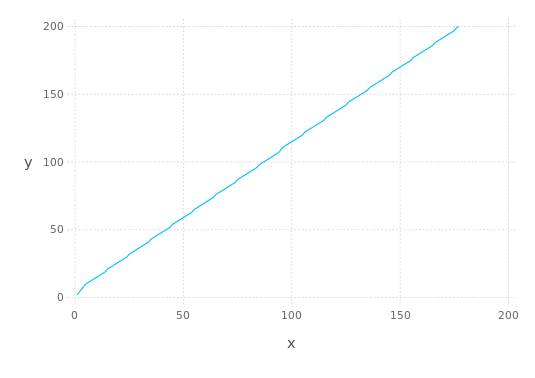

In [2]:
using Gadfly
plot(x=1:length(Q), y=Q, Geom.line)

What we've seen so far is a straight line alternating between slopes $1$ and $2$. This is strong evidence towards our conclusion. But to understand more, perhaps it will help to plot the function $\operatorname{ksk}(k) = k + \operatorname{s}(k)$ directly. 

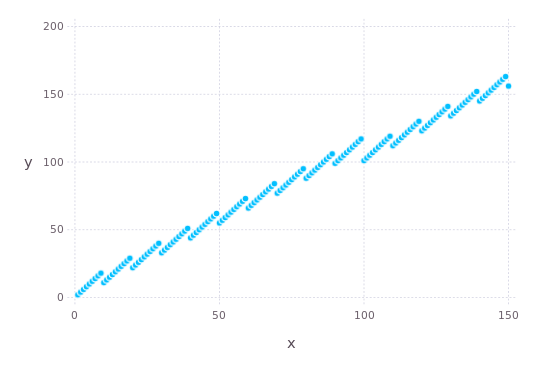

In [3]:
plot(x=1:150, y=map(ksk, 1:150))

What we have discovered is no revolution. Indeed, it's a fairly simple result. If $k$ does not end in $9$, then $\operatorname{s}(k+1)=\operatorname{s}(k)+1$, so we have $\operatorname{ksk}(k+1) = \operatorname{ksk}(k) + 2$ for all $k$ not ending in $9$. And if $k$ does end in $9$, then we know $\operatorname{s}(k+1)<\operatorname{s}(k)$ (in fact, it's not hard to show that the digit sum must decrease by a number of the form $9\ell+8$).

At this point we (with only $5$ lines of code) have seen an approach to solving this problem. All possible values for $n$ will intersect at least one of the ascending lines with slope $2$, and therefore at least one of $n$ and $n+1$ will be in the set $Q$, and therefore $n\in S$, and that's what we wanted to prove. To close off, I'll present a more rigourous wording for the proof. As an exercise, generalize the proof to other bases.

## Theorem (KSK for Base 10)

Let $\operatorname{s}(k)$ denotes the sum of the digits of $k$, when expressed in base $10$. Then

\begin{equation}
\left\{k + \operatorname{s}(k) \mid k\in\mathbb{Z}^+\right\} \cup
\left\{k + \operatorname{s}(k) - 1 \mid k\in\mathbb{Z}^+\right\} = \mathbb{Z}^+
\end{equation}

### Proof

Let $n$ be an arbitrary natural number, with $n>1$ (when $n=1$, the statement is very easy to prove). Consider the sequence of numbers ${(T_n)}_{n=1}^\infty$ defined as follows: \begin{equation}
 T_n = \begin{cases}
  \frac{n+1}{2} + \operatorname{s}\left(\frac{n+1}{2}\right) - 1 & \text{if }n\text{ odd} \\
  \frac{n}{2} + \operatorname{s}\left(\frac{n}{2}\right) & \text{if }n\text{ even}
 \end{cases}
\end{equation}

In other words, the sequence ${(T_n)}_{n=1}^\infty$ is as follows: \begin{equation}
1 + \operatorname{s}(1) - 1, 1 + \operatorname{s}(1), 2 + \operatorname{s}(2) - 1, 2 + \operatorname{s}(2), \dots, n + \operatorname{s}(n) - 1, n + \operatorname{s}(n), \dots
\end{equation}

We will show by induction that for all $n\in\mathbb{Z}^+$, $T_n<n$. In the base case, $T_1 = 1 + \operatorname{s}(1) = 1 < n$. Assume now that $T_m < n$ for some $m$. Now we will consider three cases.

#### Case 1

Let us suppose that $m$ is odd and hence \begin{equation}
T_m = \frac{n+1}{2} + \operatorname{s}\left(\frac{n+1}{2}\right) - 1
\end{equation}

Then by definition of tuple $T$, \begin{equation}
T_{m+1}=\frac{n+1}{2} + \operatorname{s}\left(\frac{n+1}{2}\right) = T_m + 1
\end{equation}

Hence $T_{m+1}=T_m + 1$. But $T_m<n$, so therefore $T_{m+1}<n+1$ and so $T_{m+1}\le n$. But by the supposition, $T_{m+1}\ne n$, so $T_{m+1}<n$.

#### Case 2

Let us suppose that $m$ is even. Assume $\frac{m}{2}$ does not have final digit $9$. Then $\operatorname{s}\left(\frac{m}{2}\right)$ **rest to come**